In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import print_function
from orphics import maps,io,cosmology,stats,btip
from enlib import enmap
import numpy as np

In [25]:
deg = 2.
px = 2.0
shape,wcs,modlmap,cc,mgen = maps.flat_sim(deg,px,lmax=6000,lensed=True,pol=True)
modrmap = enmap.modrmap(shape,wcs)
modlmap = enmap.modlmap(shape,wcs)

p2d = cosmology.power_from_theory(modlmap,cc.theory,lensed=True,pol=True)        
print(p2d.shape)
rot = enmap.queb_rotmat(enmap.lmap(shape,wcs), inverse=True, iau=False)
print(rot.shape)

p2dIQU = p2d.copy()
p2dIQU[...,-2:,:,:] = enmap.map_mul(rot, p2d[...,-2:,:,:])
print(p2dIQU.shape)

Generating theory Cls...
Loaded cached Cls from  output/clsAll_low_acc_False_6000_20180310.pkl
Loaded cached Cls from  output/clphi_low_acc_False_6000_20180310.txt
(3, 3, 60, 60)
(2, 2, 60, 60)
(3, 3, 60, 60)


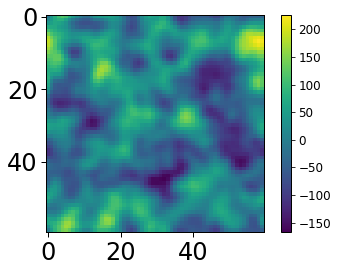

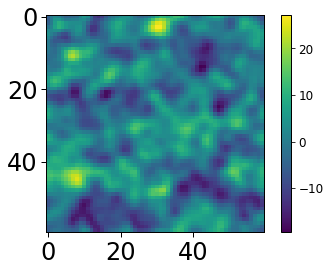

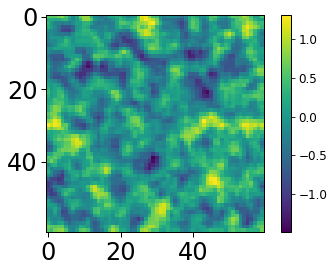

In [26]:
mgen1 = maps.MapGen(shape,wcs,p2d)
imap = mgen1.get_map(scalar=True,seed=0)
io.plot_img(imap[0])
io.plot_img(imap[1])
io.plot_img(imap[2])

In [27]:
tt2d = p2d[0,0].copy()
print(tt2d.shape)
fcov = maps.diagonal_cov(tt2d)
print(fcov.shape)
pcov = maps.pixcov(shape[-2:],wcs,fcov)
print(pcov.shape)

(60, 60)
(1, 1, 60, 60, 60, 60)
(1, 1, 60, 60, 60, 60)


/home/msyriac/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


(60, 60)


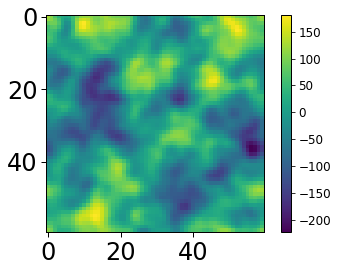

In [28]:
sim = np.random.multivariate_normal(np.zeros(np.prod(shape[-2:])),cov=pcov.reshape((np.prod(shape[-2:]),np.prod(shape[-2:])))).reshape(shape[-2:])
print(sim.shape)
io.plot_img(sim)

(3, 3, 60, 60, 60, 60)
(3, 3, 60, 60, 60, 60)
TT


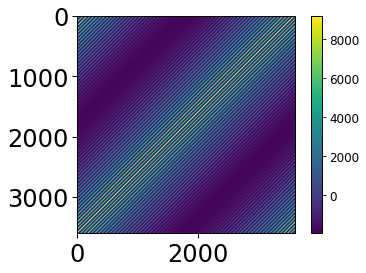

TE


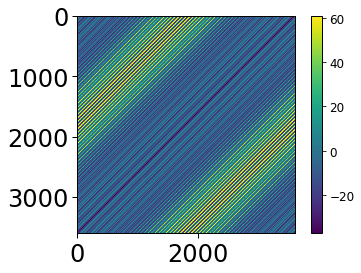

TB


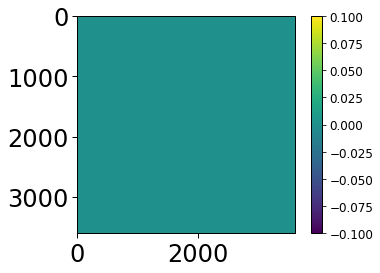

EE


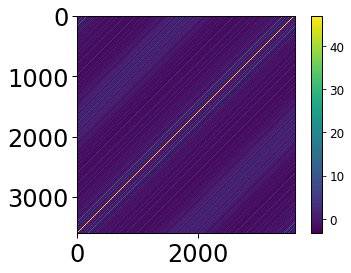

EB


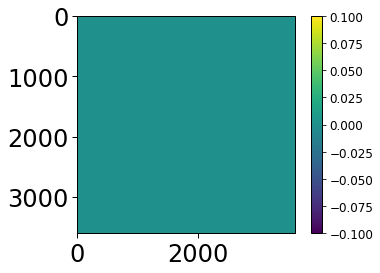

BB


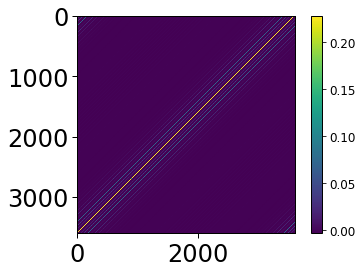

In [37]:
fcov = maps.diagonal_cov(p2d)
print(fcov.shape)
pcov = maps.pixcov(shape,wcs,fcov)
print(pcov.shape)
teb = ['T','E','B']
for i in range(3):
    for j in range(i,3):
        print(teb[i]+teb[j])
        io.plot_img(pcov[i,j].reshape(np.prod(shape[-2:]),np.prod(shape[-2:])))

/home/msyriac/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


(60, 60)


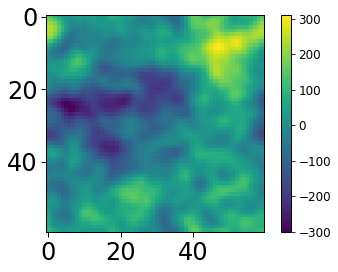

In [32]:
pcov2 = pcov[0,0].copy()
sim = np.random.multivariate_normal(np.zeros(np.prod(shape[-2:])),cov=pcov2.reshape((np.prod(shape[-2:]),np.prod(shape[-2:])))).reshape(shape[-2:])
print(sim.shape)
io.plot_img(sim)
#io.plot_img(sim[1])
#io.plot_img(sim[2])

/home/msyriac/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


(10800,)


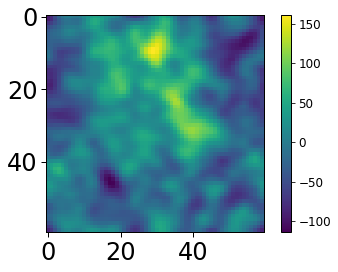

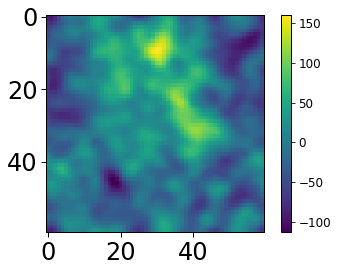

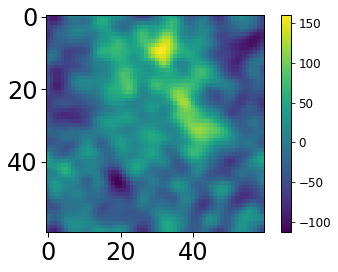

In [33]:
sim = np.random.multivariate_normal(np.zeros(np.prod(shape)),cov=pcov.reshape((np.prod(shape),np.prod(shape))))
print(sim.shape)
sim = sim.reshape(shape)
io.plot_img(sim[0])
io.plot_img(sim[1])
io.plot_img(sim[2])